In [80]:
import pandas as pd
from plotly import express as px
import plotly.graph_objects as go

import json
from skimage import io
import statsmodels as sm
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data = json.load(open('body-parts-pg3.json'))

In [3]:
df = pd.DataFrame.from_dict(data, orient='index')

In [4]:
sorted(data['results-pg3/1897-AudreyCraven-29766.0.txt-annotated.txt'], reverse=True)

[[102,
  'hand.n.01',
  'external_body_part.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [45,
  'eye.n.01',
  'organ.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [44,
  'face.n.01',
  'external_body_part.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [37,
  'head.n.01',
  'external_body_part.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [18,
  'finger.n.01',
  'external_body_part.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [16,
  'lip.n.01',
  'organ.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [14,
  'back.n.01',
  'back.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [12,
  'shoulder.n.01',
  'shoulder.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [10,
  'arm.n.01',
 

In [5]:
dataClean = {fn.strip("results-pg3/").strip(".txt-annotated.txt"): 
             {l[1]: l[0] for l in d} for fn, d in data.items()}

In [6]:
df = pd.DataFrame(dataClean).fillna(0).T
df.sum().sort_values()

limbus.n.01            1.0
ureter.n.01            1.0
upper_jaw.n.01         1.0
fistula.n.02           1.0
nucleolus.n.01         1.0
                    ...   
arm.n.01           29137.0
head.n.01          41131.0
face.n.01          51991.0
eye.n.01           86701.0
hand.n.01         156058.0
Length: 497, dtype: float64

In [7]:
with open("wordCounts4.json") as f:
    wordCounts = json.load(f)

In [8]:
wordCounts = {fn.strip('.txt'): count for fn, count in wordCounts.items()}

In [9]:
len(wordCounts)

1607

In [10]:
len(df)

1599

Remove those items which we don't have data for. 

In [11]:
for fn in (wordCounts.keys() - df.index):
    del wordCounts[fn]

In [12]:
proportions = df.div(wordCounts, axis=0)

In [13]:
top20 = proportions.sum().sort_values(ascending=False).head(30)

In [14]:
other = proportions.sum().sort_values(ascending=False).tail(len(proportions.sum())-30)

In [15]:
other.sum()

1.4108516910914075

In [26]:
proportions.sum(axis=1).sort_values(ascending=False).head(30)

18344-PhrenologicalDevelopmentofRobertBurnsFromaC-30489.0    0.015873
1873-TheRomanceofLustAClassicVictorianeroticnov-30254.0      0.015285
1921-LeonieoftheJungle-15841.0                               0.014817
1915-TheDreamerofDreams-40950.0                              0.012865
18966-TheWereWolf-13131.0                                    0.011674
1922-TheHawkofEgypt-15721.0                                  0.011454
1906-TheFifthQueenAndHowSheCametoCourt-30188.0               0.011236
1920-DesertLove-15242.0                                      0.011103
1907-PrivySealHisLastVenture-26698.0                         0.010192
1898-BobSonofBattle-2795.0                                   0.009757
1915-BeltanetheSmith-10064.0                                 0.009569
1922-TheReturnofBluePete-25230.0                             0.009509
1906-GasparRuiz-8736.0                                       0.009438
1916-TheReturnofDrFuManchu-1183.0                            0.009395
1897-TheNiggerOfTheN

In [27]:
proportions.sum(axis=1).sort_values(ascending=True).head(30)

191011-TheMahoganyTree-45921.0                                0.000000
18935-EightIllustrationstoShakespearesTempestDesig-23479.0    0.000000
1847-PrefacestoFiction-14525.0                                0.000269
1901-OssianinGermanyBibliographyGeneralSurveyOs-40784.0       0.000498
1912-ModernEnglishBooksofPower-19222.0                        0.000906
1871-LadySusan-946.0                                          0.000914
1813-PrideandPrejudice-1342.0                                 0.000971
1896-StudiesinEarlyVictorianLiterature-18384.0                0.001012
1916-RomanceTwoLectures-19367.0                               0.001022
191111-TheBrowningsTheirLifeandArt-30671.0                    0.001038
1813-PrideandPrejudice-42671.0                                0.001044
1918-MeccaniatheSuperState-44074.0                            0.001096
1904-Reginald-2830.0                                          0.001138
1897-AnAlmanacofTwelveSports-34113.0                          0.001148
188312

In [28]:
proportions['sum'] = proportions.sum()

In [33]:
proportions['year'] = proportions.index.str.slice(0,4).astype(int)

In [50]:
del proportions['sum']

KeyError: 'sum'

In [55]:
del proportions['year']

In [63]:
sums = pd.DataFrame(proportions.sum(axis=1), columns=['proportions of body parts'])

In [64]:
sums['year'] = sums.index.str.slice(0,4).astype(int)

In [73]:
sums

,proportions of body parts,year
1897-AudreyCraven-29766.0,0.004410,1897
18721130-FrankMildmayOrTheNavalOfficer-13010.0,0.003556,1872
1907-TheWhiteHandandtheBlackAStoryoftheNatal-32911.0,0.003617,1907
188911-ThePoeticalWorksofThomasHood-15652.0,0.006125,1889
1893-NovelNotes-2037.0,0.003923,1893
...,...,...
190311-TheNebulyCoat-22943.0,0.003103,1903
1921-AndEvenNow-1956.0,0.002652,1921
1877-TheAmericanSenator-5118.0,0.002151,1877
1810-TheLadyoftheLake-3011.0,0.003440,1810


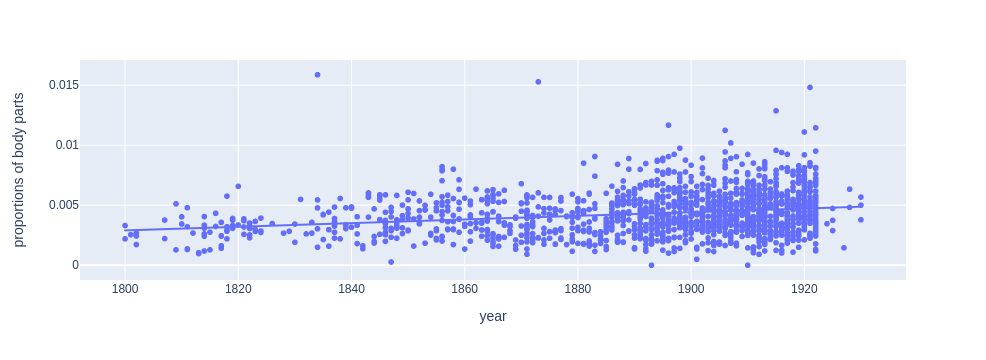

In [76]:
fig = px.scatter(sums, y='proportions of body parts', x='year', trendline='ols', hover_name=sums.index)
fig.write_html('../includes/bodyPartDiachronic.html', 
               default_width='70%', default_height='50%', full_html=False, include_plotlyjs=False)
fig.show()

In [78]:
def increase18001920(synset, df):
    lr = LinearRegression()
    df = df[[synset, 'year']].dropna()
    lr.fit(df[['year']], df[[synset]])
    predictions = lr.predict(np.array([1800, 1920]).reshape(-1, 1))
    return (predictions[1] - predictions[0]) / predictions[0]

In [81]:
increase18001920('proportions of body parts', sums)

array([0.62809461])

There's a 63% increase in body parts between 1800 and 1920.


In [47]:
top20Df = pd.DataFrame(top20)
top20Df.loc['other'] = other.sum()
top20Df['body part'] = top20Df.index

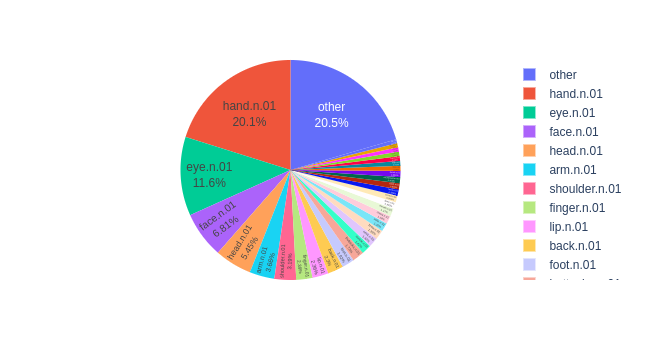

In [49]:
fig = px.pie(top20Df, values=0, names='body part')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.write_html('../includes/bodyPartSums.html', default_width='70%', 
               default_height='50%', full_html=False, include_plotlyjs=False)
fig.show()

In [50]:
top20

hand.n.01           1.386295
eye.n.01            0.797158
face.n.01           0.468804
head.n.01           0.374718
arm.n.01            0.251589
shoulder.n.01       0.219526
finger.n.01         0.164217
lip.n.01            0.162536
back.n.01           0.158255
foot.n.01           0.125586
buttocks.n.01       0.119277
auricle.n.02        0.097487
neck.n.01           0.097418
brow.n.01           0.095546
stifle.n.01         0.086683
cheek.n.01          0.081407
mouth.n.01          0.080387
bone.n.01           0.068256
breast.n.02         0.066680
torso.n.01          0.064254
tooth.n.01          0.062377
countenance.n.03    0.062177
throat.n.01         0.061663
chin.n.01           0.050941
heart.n.02          0.049249
feature.n.02        0.047842
knee.n.01           0.045895
ear.n.01            0.043331
mouth.n.02          0.041806
hair.n.03           0.039316
dtype: float64

In [51]:
bodyPoints = [("hand.n.01", 53, 562), ("eye.n.01", 200, 75), ("face.n.01", 220, 50),
              ("head.n.01", 220, 20), ("arm.n.01", 122,336), ("shoulder.n.01", 133, 209),
              ("finger.n.01", 50, 616), ("lip.n.01", 220, 120), ("back.n.01", 220, 256), 
              ("foot.n.01", 156, 956), ("buttocks.n.01", 181, 556), ("auricle.n.02", 170, 92),
              ("neck.n.01", 220,175), ("brow.n.01", 240, 50), ("stifle.n.01", 174, 766),
              ("cheek.n.01", 240, 100), ("mouth.n.01", 240, 110), ("breast.n.02", 180, 304),
              ("torso.n.01", 220, 320), ("tooth.n.01", 240, 105), ("throat.n.01", 220, 170),
              ("chin.n.01", 220, 120), ("heart.n.02", 280, 267), ("hair.n.03", 240, 18)]


In [52]:
def getSize(name):
    return top20[name] * 30

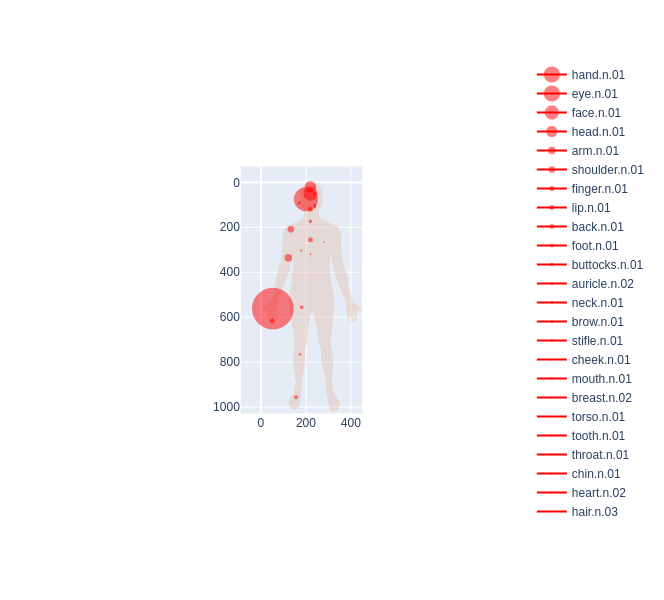

In [53]:
img = io.imread('Human_body_silhouette.svg.png')
fig = px.imshow(img, height=600)
for point in bodyPoints:
    name, x, y = point
    size = getSize(name)
    fig.add_trace(go.Scatter(name=name, x=[x], y=[y], marker=dict(color='red', size=size, opacity=0.5)))
fig.show()

In [56]:
fig.write_html("../includes/bodyPartSumsBody.html", 
               default_width="70%", full_html=False, include_plotlyjs=True)